In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids

In [7]:
stars_df = pd.DataFrame(pd.read_csv('27_B_17834.csv', header=0, decimal=',', sep=';'))

stars_df.info()
stars_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       9900 non-null   float64
 1   Y       9900 non-null   float64
dtypes: float64(2)
memory usage: 154.8 KB


,X,Y
0,7.084,7.959
1,-0.759,5.781
2,6.736,4.640
3,7.899,7.361
4,0.297,5.932


C:\Users\user20\AppData\Local\Temp\ipykernel_12248\1699208114.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Обозначения')


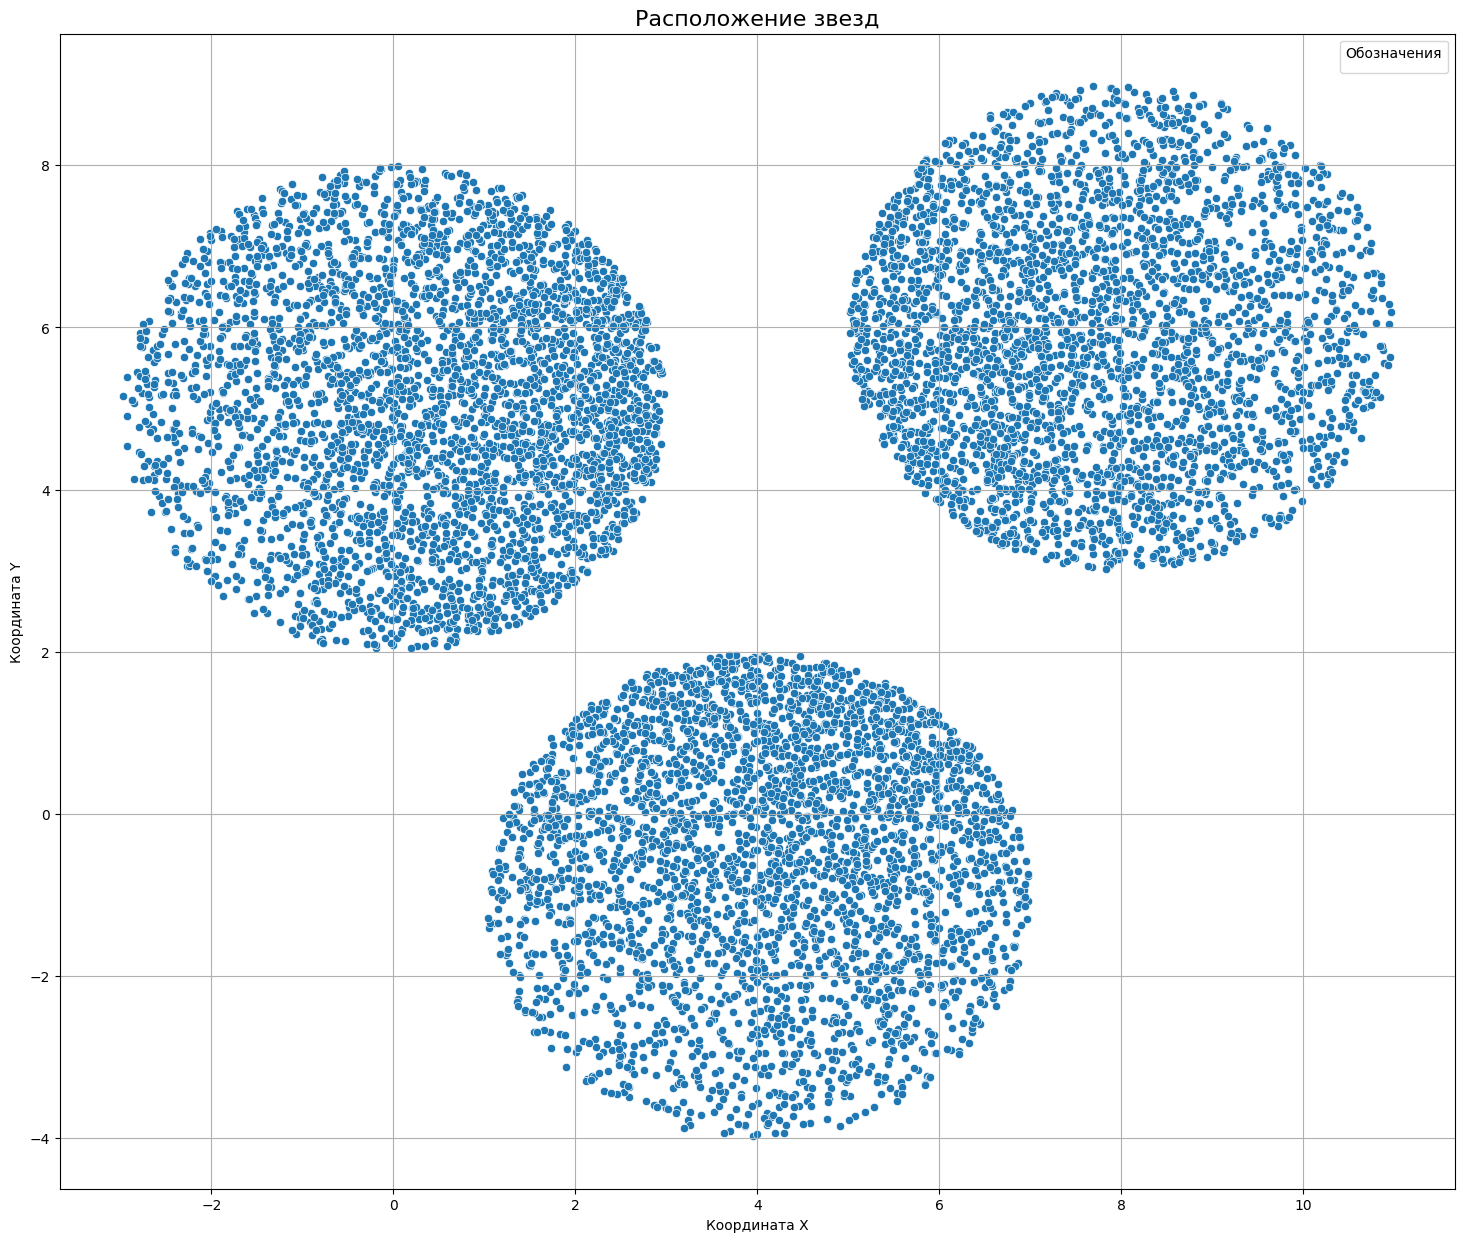

In [8]:
plt.figure(figsize=(18, 15))
sns.scatterplot(data=stars_df,
                x='X', y='Y')
plt.title('Расположение звезд', fontsize=16)
plt.xlabel('Координата X')
plt.ylabel('Координата Y')
plt.legend(title='Обозначения')
plt.grid(True)
plt.show()

In [9]:
# Применение K-Medoids
kmedoids = KMedoids(n_clusters=3, random_state=0, metric='euclidean')
kmedoids.fit(stars_df[['X', 'Y']])

# Получение координат медиоидов (центроидов)
centroids = stars_df.iloc[kmedoids.medoid_indices_]
centroids_df = pd.DataFrame(centroids)
medoid_indices = kmedoids.medoid_indices_

# Вывод координат центроидов
print("Координаты центроидов кластеров:")
for i, idx in enumerate(medoid_indices):
    centroid = stars_df.iloc[idx]
    print(f"Кластер {i}: X={centroid['X']:.3f}, Y={centroid['Y']:.3f}")

# Дополнительно: вывод информации о кластерах
labels = kmedoids.labels_
for i in range(3):
    cluster_points = stars_df[labels == i]
    centroid = centroids.iloc[i]
    print(f"\nКластер {i}:")
    print(f"  Количество звёзд: {len(cluster_points)}")
    print(f"  Центроид: индекс {medoid_indices[i]}, координаты ({centroid['X']:.3f}, {centroid['Y']:.3f})")
    
    # Проверка максимального расстояния от центроида до точек кластера
    distances = np.sqrt((cluster_points['X'] - centroid['X'])**2 + 
                        (cluster_points['Y'] - centroid['Y'])**2)
    max_distance = distances.max()
    print(f"  Максимальное расстояние от центроида: {max_distance:.3f}")
    if max_distance <= 3:
        print("  ✓ Все точки находятся в пределах радиуса R=3")
    else:
        print(f"  ⚠ Некоторые точки находятся дальше чем R=3 (макс: {max_distance:.3f})")

Координаты центроидов кластеров:
Кластер 0: X=0.549, Y=5.016
Кластер 1: X=7.563, Y=5.851
Кластер 2: X=4.146, Y=-0.294

Кластер 0:
  Количество звёзд: 3500
  Центроид: индекс 2585, координаты (0.549, 5.016)
  Максимальное расстояние от центроида: 3.524
  ⚠ Некоторые точки находятся дальше чем R=3 (макс: 3.524)

Кластер 1:
  Количество звёзд: 3200
  Центроид: индекс 9435, координаты (7.563, 5.851)
  Максимальное расстояние от центроида: 3.441
  ⚠ Некоторые точки находятся дальше чем R=3 (макс: 3.441)

Кластер 2:
  Количество звёзд: 3200
  Центроид: индекс 3374, координаты (4.146, -0.294)
  Максимальное расстояние от центроида: 3.703
  ⚠ Некоторые точки находятся дальше чем R=3 (макс: 3.703)


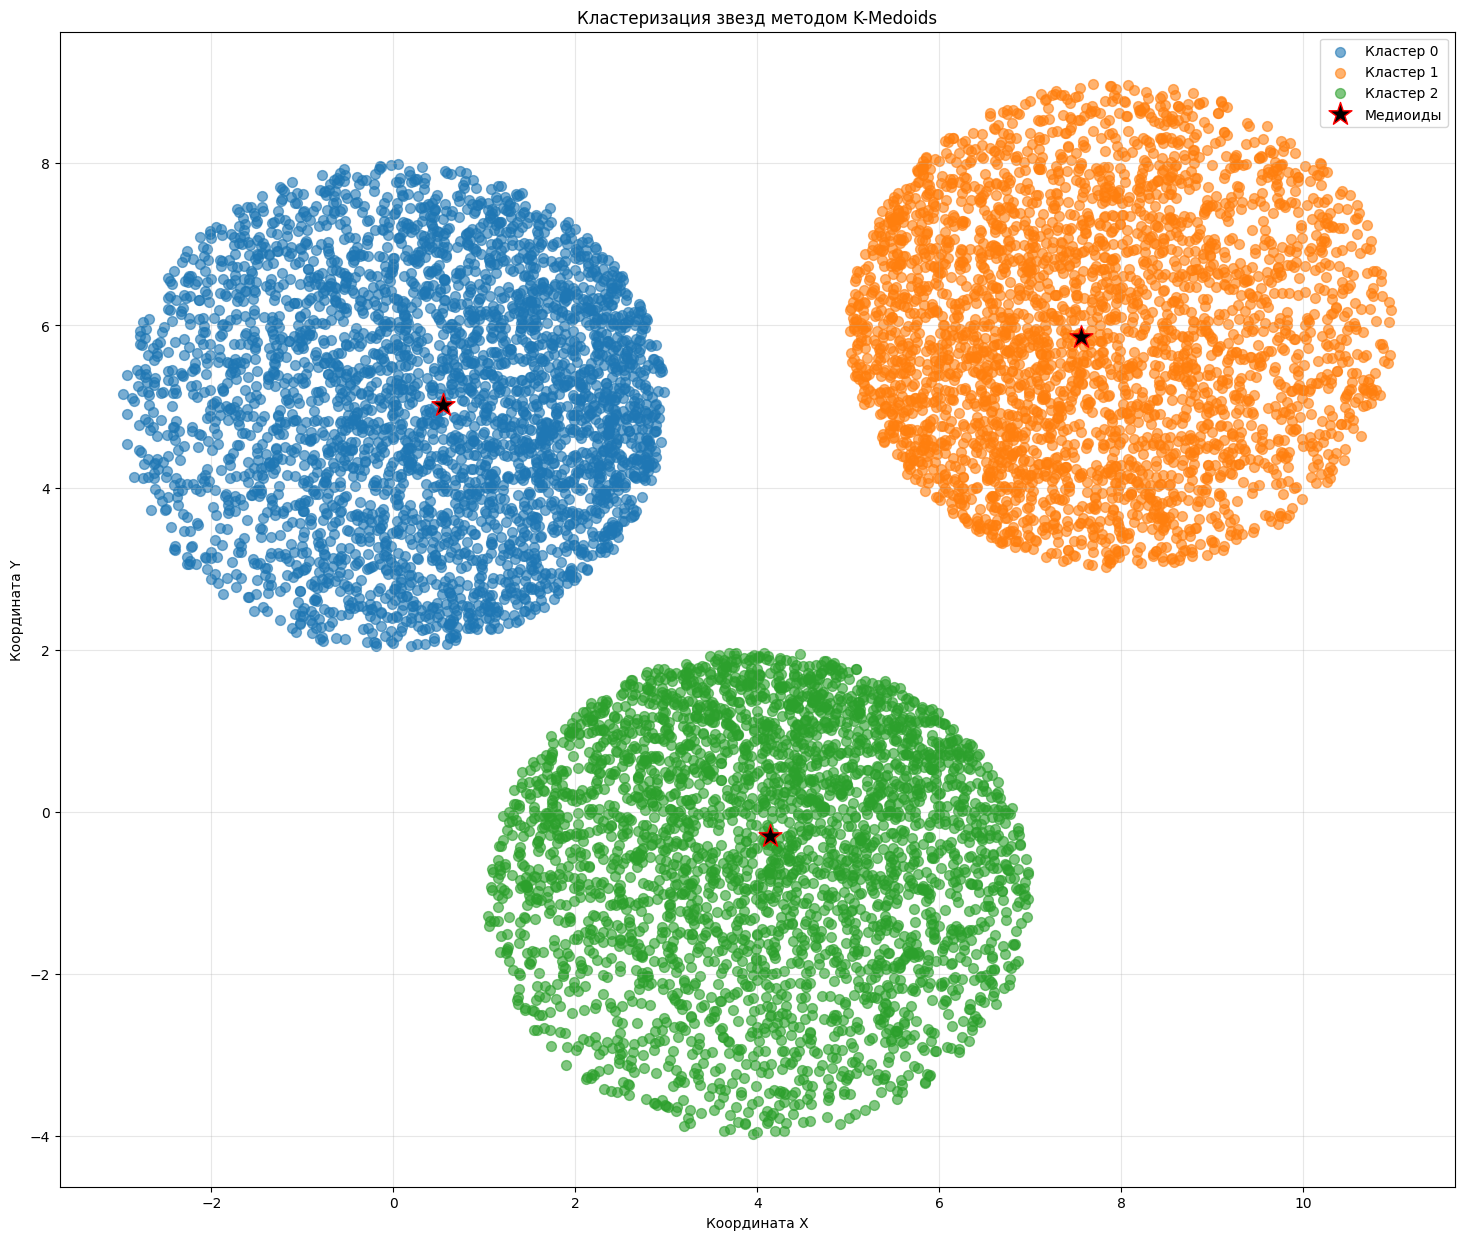

In [13]:
# Визуализация с центроидами
plt.figure(figsize=(18, 15))
for cluster_num in range(3):
    # Выбираем точки, принадлежащие текущему кластеру
    cluster_data = stars_df[labels == cluster_num]
    plt.scatter(cluster_data['X'], cluster_data['Y'], 
                label=f'Кластер {cluster_num}', 
                alpha=0.6, s=50)

# Отмечаем медиоиды (центры кластеров) специальными маркерами
plt.scatter(centroids['X'], centroids['Y'], 
           s=300, marker='*', c='black', label='Медиоиды', edgecolors='red')

# Настройки графика
plt.xlabel('Координата X')
plt.ylabel('Координата Y')
plt.title('Кластеризация звезд методом K-Medoids')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()